<a href="https://colab.research.google.com/github/dizzy07/Football/blob/main/Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load datasets
results = pd.read_csv('/content/results.csv')
shootouts = pd.read_csv('/content/shootouts.csv')
goalscorers = pd.read_csv('/content/goalscorers.csv')

# Calculate the number of goals by each team (both home and away)
home_goals = results[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
away_goals = results[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})

# Combine home and away goals into a single dataframe
all_goals = pd.concat([home_goals, away_goals])

# Calculate the total number of goals by each team
total_goals_by_team = all_goals.groupby('team').sum().reset_index()

# Select the top 20 teams by total goals scored
top_20_teams = total_goals_by_team.nlargest(20, 'score')['team']

# Filter the original results dataset to include only the top 20 teams
top_20_results = results[(results['home_team'].isin(top_20_teams)) | (results['away_team'].isin(top_20_teams))]

# Prepare data for the violin plot
home_scores = top_20_results[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
home_scores['location'] = 'Home'
away_scores = top_20_results[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})
away_scores['location'] = 'Away'

# Combine home and away scores into a single dataframe
scores_df = pd.concat([home_scores, away_scores])

# Filter scores_df to include only top 20 teams
scores_df = scores_df[scores_df['team'].isin(top_20_teams)]


<ipython-input-2-c6c1cf8d349c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goals_by_team.index, y=goals_by_team.values, palette='viridis')


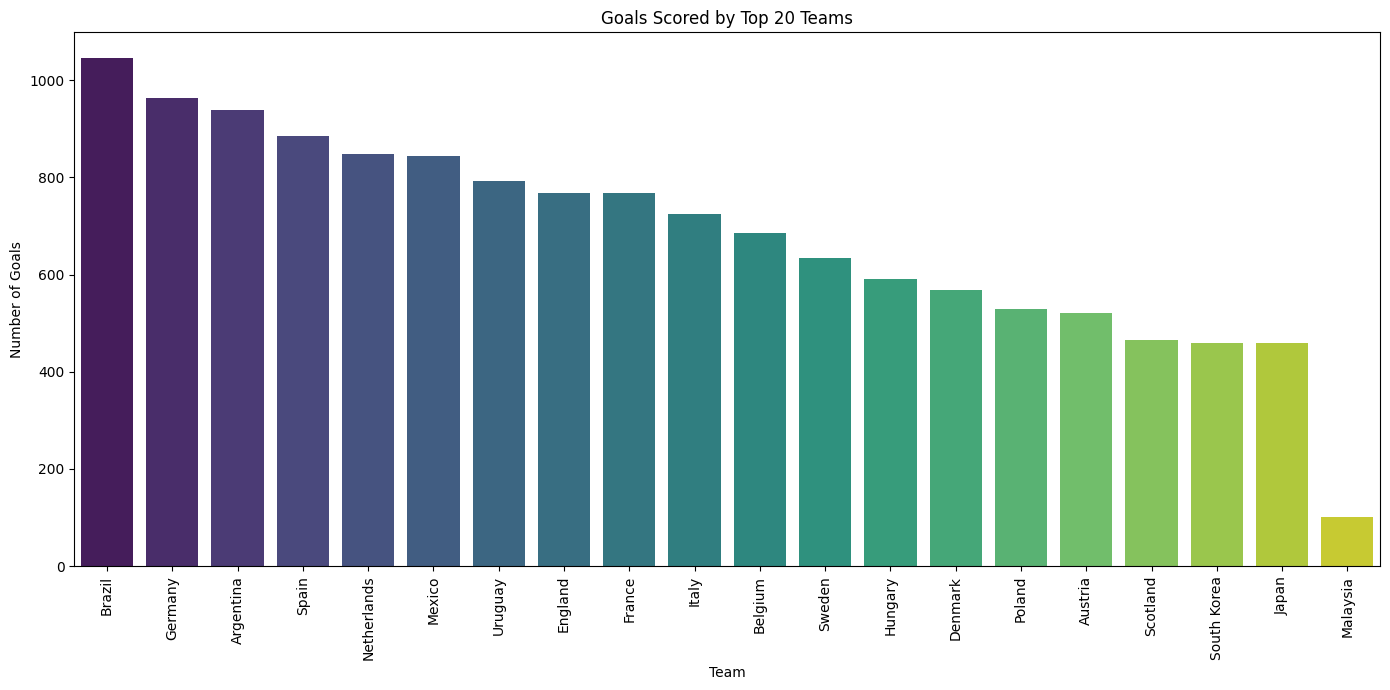

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of goals by each team in goalscorers
goals_by_team = goalscorers[goalscorers['team'].isin(top_20_teams)]['team'].value_counts()

# Bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=goals_by_team.index, y=goals_by_team.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Goals Scored by Top 20 Teams')
plt.xlabel('Team')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.savefig('bar_plot_top_20_teams_goals.png')
plt.show()


<ipython-input-3-195454a0d0c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_results['total_goals'] = top_20_results['home_score'] + top_20_results['away_score']


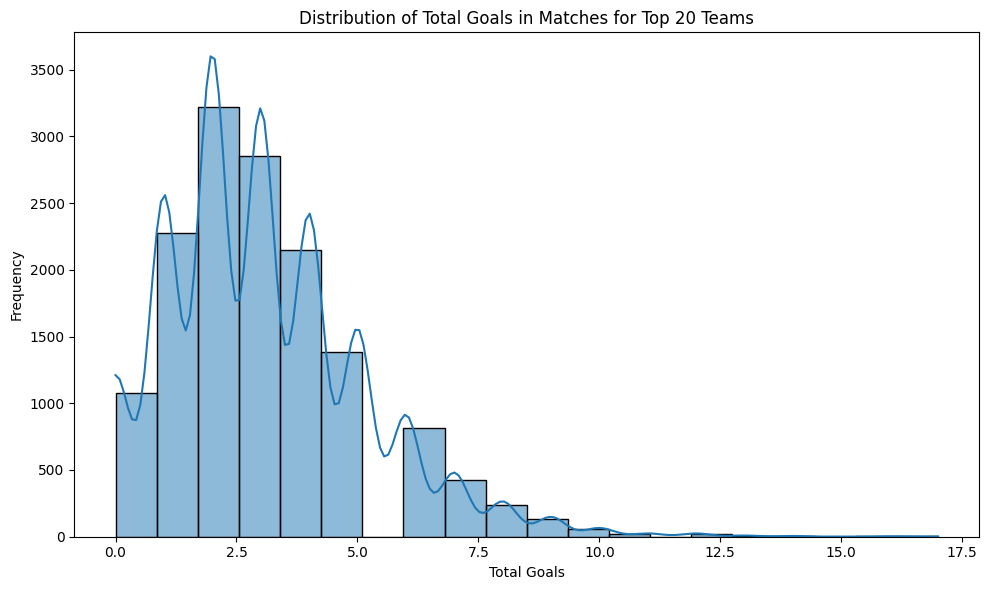

In [3]:
# Calculate total goals per match for top 20 teams
top_20_results['total_goals'] = top_20_results['home_score'] + top_20_results['away_score']

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(top_20_results['total_goals'], bins=20, kde=True)
plt.title('Distribution of Total Goals in Matches for Top 20 Teams')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histogram_total_goals_top_20_teams.png')
plt.show()


<ipython-input-4-d6abf005e95b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_results['match_outcome'] = 'Draw'


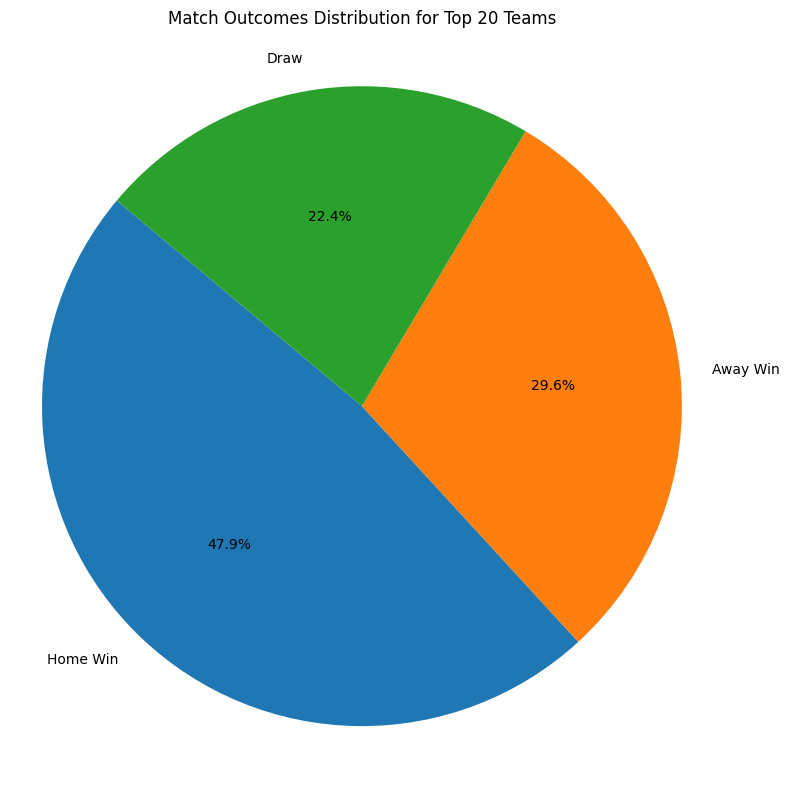

In [4]:
# Create a new column for match outcome
top_20_results['match_outcome'] = 'Draw'
top_20_results.loc[top_20_results['home_score'] > top_20_results['away_score'], 'match_outcome'] = 'Home Win'
top_20_results.loc[top_20_results['home_score'] < top_20_results['away_score'], 'match_outcome'] = 'Away Win'

# Calculate the percentage of each match outcome
outcome_counts = top_20_results['match_outcome'].value_counts()
outcome_percentages = (outcome_counts / outcome_counts.sum()) * 100

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_percentages, labels=outcome_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Match Outcomes Distribution for Top 20 Teams')
plt.axis('equal')
plt.tight_layout()
plt.savefig('pie_chart_match_outcomes_top_20_teams.png')
plt.show()


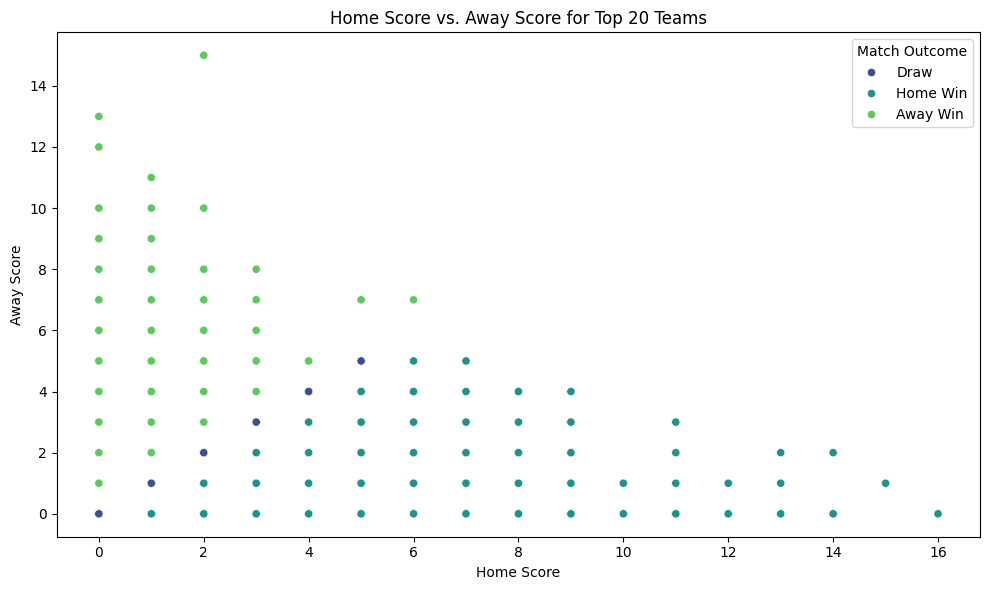

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20_results, x='home_score', y='away_score', hue='match_outcome', palette='viridis')
plt.title('Home Score vs. Away Score for Top 20 Teams')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.legend(title='Match Outcome')
plt.tight_layout()
plt.savefig('scatter_plot_home_away_scores_top_20_teams.png')
plt.show()


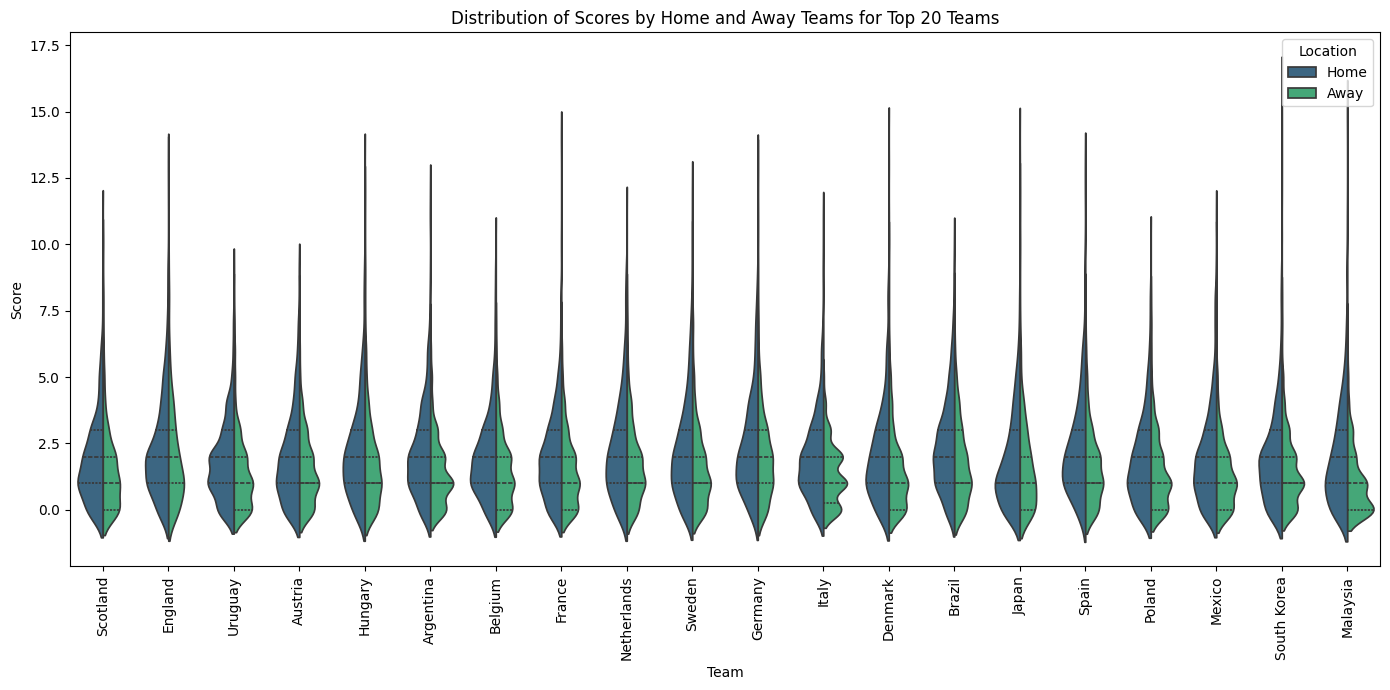

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
results = pd.read_csv('results.csv')

# Calculate the number of goals by each team (both home and away)
home_goals = results[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
away_goals = results[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})

# Combine home and away goals into a single dataframe
all_goals = pd.concat([home_goals, away_goals])

# Calculate the total number of goals by each team
total_goals_by_team = all_goals.groupby('team').sum().reset_index()

# Select the top 20 teams by total goals scored
top_20_teams = total_goals_by_team.nlargest(20, 'score')['team']

# Filter the original results dataset to include only the top 20 teams
top_20_results = results[(results['home_team'].isin(top_20_teams)) | (results['away_team'].isin(top_20_teams))]

# Prepare data for the violin plot
home_scores = top_20_results[['home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'score'})
home_scores['location'] = 'Home'
away_scores = top_20_results[['away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'score'})
away_scores['location'] = 'Away'

# Combine home and away scores into a single dataframe
scores_df = pd.concat([home_scores, away_scores])

# Filter scores_df to include only top 20 teams
scores_df = scores_df[scores_df['team'].isin(top_20_teams)]

# Drop any rows with missing values to avoid issues during plotting
scores_df.dropna(inplace=True)

# Reset index to avoid potential issues with duplicate indices
scores_df.reset_index(drop=True, inplace=True)

# Violin plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='team', y='score', hue='location', data=scores_df, split=True, inner='quart', palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Scores by Home and Away Teams for Top 20 Teams')
plt.xlabel('Team')
plt.ylabel('Score')
plt.legend(title='Location')
plt.tight_layout()
plt.savefig('violin_plot_scores_top_20_teams.png')
plt.show()
